<a href="https://colab.research.google.com/github/mpartain1/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [3]:
df = pd.read_csv('/content/sales_predictions.csv')

In [4]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
df.shape
#1) 8523 rows, 12 columns

(8523, 12)

In [6]:
df.info()
#2) See below for data types of each variable under Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#3) No duplicates, but wanted to show the code nonetheless
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


In [8]:
#4) 1463 missing values for Item_Weight, 2410 missing values for Outlet_Size
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#5)
#grouped = df.groupby('Item_Type')
#grouped_means = grouped['Item_Weight'].mean()
#print(grouped_means)
#Notice that all the group means hover around 12
#mean_weight = df['Item_Weight'].mean()
#print(mean_weight)
#df['Item_Weight'].fillna(mean_weight, inplace = True)
#For Item_Weight, I addressed the missing values by taking the mean
#weight of every item since this method was simple and made sense.

df['Item_Outlet_Sales'].describe().round(2)
for i in range (df.shape[0]):
  if (df['Item_Outlet_Sales'][i] > 3101):
    df['Outlet_Size'].fillna('High', inplace = True)
  elif ((df['Item_Outlet_Sales'][i] > 834) & (df['Item_Outlet_Sales'][i] < 3101)):
    df['Outlet_Size'].fillna('Medium', inplace = True)
  else:
    df['Outlet_Size'].fillna('Small', inplace = True)
#For Outlet_Size, I filled in missing values according to the
#pattern of Item_Outlet_Sales since I would imagine there is a 
#positive correlation between the two.




In [10]:
#6)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#7)
df['Item_Fat_Content'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
#8) 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


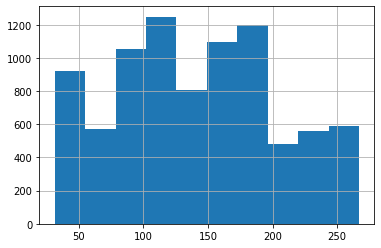

In [13]:
df['Item_MRP'].hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f147aca6d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f147acabd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f147acb2d50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f147acb2810>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f147b2d2510>,
  <matplotlib.lines.Line2D at 0x7f147ac53410>]}

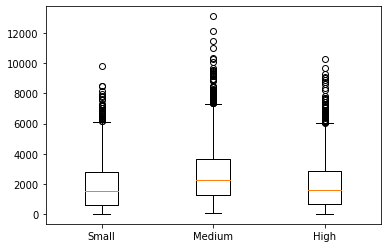

In [14]:
Small = df.loc[df['Outlet_Size']=='Small',:]
Medium = df.loc[df['Outlet_Size']=='Medium',:]
Large = df.loc[df['Outlet_Size']=='High',:]
plt.boxplot([Small['Item_Outlet_Sales'],Medium['Item_Outlet_Sales'],Large['Item_Outlet_Sales']], labels = ['Small', 'Medium', 'High'])
#From these plots we can tell that largest volume of sales was surprisingly not from the large outlet stores, but from the medium ones.

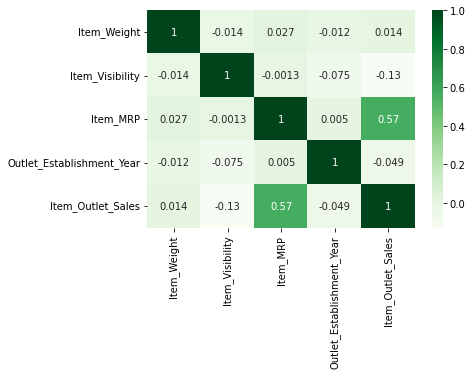

In [15]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)
#From this we can conclude that Item_Weight and Item_Outlet_Sales are most correlated, which basically means higher weight generally means a higher selling item.

Text(0.5, 1.0, 'Item Sales as a Function of Weight')

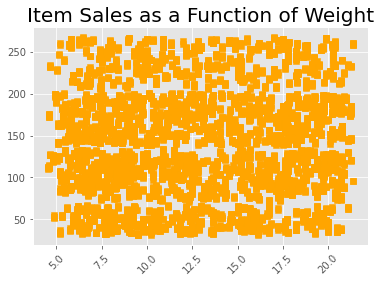

In [16]:
plt.style.use('ggplot')
plt.scatter(df['Item_Weight'], df['Item_MRP'], c = 'orange', marker = ',')
plt.xticks(rotation=45)
plt.title('Item Sales as a Function of Weight', fontsize = 20)
#I was curious to see if item weight influences item market retail price.  
#It appears there is a pretty even distribution of prices across the various 
# item weights.

Text(0.5, 1.0, 'Soft Drink Sales with Below Average Visibility')

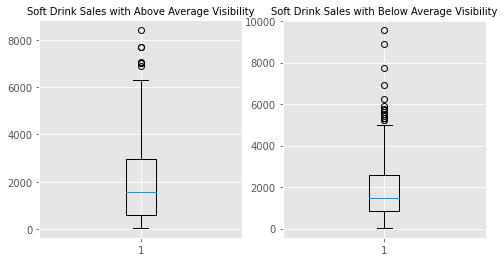

In [17]:
SoftDrinks = df.loc[df['Item_Type']=='Soft Drinks', :]
VisMean = SoftDrinks['Item_Visibility'].mean()
MostVisibility = SoftDrinks.loc[SoftDrinks['Item_Visibility']>VisMean, 'Item_Outlet_Sales']
LeastVisibility = SoftDrinks.loc[SoftDrinks['Item_Visibility']<VisMean, 'Item_Outlet_Sales']

plt.figure(figsize=(8,4))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.boxplot(MostVisibility)
plt.title('Soft Drink Sales with Above Average Visibility', fontsize = 10)
plt.subplot(1, 2, 2)
plt.boxplot(LeastVisibility)
plt.title('Soft Drink Sales with Below Average Visibility', fontsize = 10)

#This boxplot confirms what was expected.  I chose to look at soft drinks because
#I thought they had the least variability in value (there are no more specific descriptions
#than type of grocery product).  From here, I wanted to see how soft drink sales were affected
#by their item visibility score within the store.  As expected, higher visibility results in
#a greater mean item sale as well as higher quartiles, with the exception of Q1.

In [19]:
y = df['Item_Outlet_Sales']
X = df.drop(columns='Item_Outlet_Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.isna().any()


Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [20]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [22]:
mean_imputer = SimpleImputer(strategy='mean')
ohe = OneHotEncoder(handle_unknown='ignore')
num_tuple = (mean_imputer, num_selector)
cat_tuple = (ohe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1478180c50>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1478180d90>)])